# Elaborar um modelo de aprendizagem de máquina

## Integrantes do Grupo:
* ALEXANDRE FERNANDES DE OLIVEIRA BESSA
* LUAN DOS SANTOS BARBOSA
* LUIS VITOR GOMES ALVES DA SILVA
* PEDRO HENRIQUE TEBERGES CAVALCANTI
* RYANDRO DA SILVA TAVARES

Dataset: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset

## Importação das bibliotecas

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 1 - Entendimento dos Dados

In [377]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [378]:
df.shape

(2930, 82)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [380]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [381]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [382]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].nunique()

MS Zoning          7
Street             2
Alley              2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       4
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Fireplace Qu       5
Garage Type        6
Garage Finish      3
Garage Qual        5
Garage Cond        5
Paved Drive        3
Pool QC            4
Fence              4
Misc Feature       5
Sale Type         10
Sale Condition     6
dtype: int64

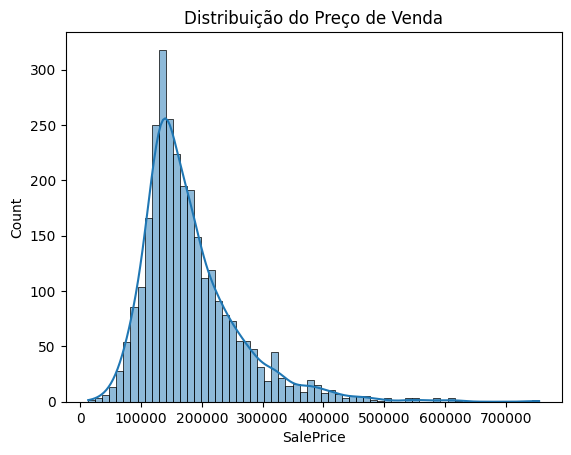

In [383]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribuição do Preço de Venda')
plt.show()

## 2 - Processamento e Tratamento

In [384]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [385]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna('None')

In [386]:
df = df.drop(['Order', 'PID', 'Alley'], axis=1)

In [387]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [388]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 79, dtype: int64

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2930 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

## 3 - Separação de Treino e Teste

In [390]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

In [391]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [392]:
print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (2344, 274)
Tamanho teste: (586, 274)


## 4 - Treinar Modelo e Registro dos Hiperparâmetros

In [393]:
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

In [394]:
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [395]:
print("Hiperparâmetros do modelo Decision Tree:")
print(dt_model.get_params())

Hiperparâmetros do modelo Decision Tree:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


## 5 - Avaliação do Modelo

In [396]:
y_pred_test = dt_model.predict(X_test)

In [397]:
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [398]:
print("=== Avaliação do Decision Tree Regressor no teste ===")
print(f"MAE (Mean Absolute Error): {mae_test:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_test:.2f}")

=== Avaliação do Decision Tree Regressor no teste ===
MAE (Mean Absolute Error): 24678.74
RMSE (Root Mean Squared Error): 36441.64


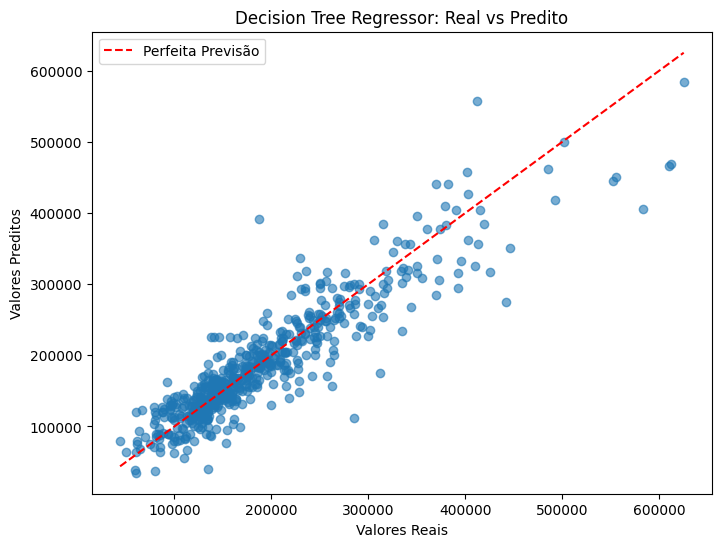

In [399]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfeita Previsão')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Decision Tree Regressor: Real vs Predito")
plt.legend()
plt.show()

## 6 - Comparação

In [400]:
y_baseline = np.full_like(y_test, y_test.mean(), dtype=np.float64)

In [401]:
mae_baseline = mean_absolute_error(y_test, y_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_baseline))

In [402]:
print("=== Baseline (média) ===")
print(f"MAE: {mae_baseline:.2f}")
print(f"RMSE: {rmse_baseline:.2f}")

=== Baseline (média) ===
MAE: 66611.04
RMSE: 89540.76


In [403]:
print("\n=== Decision Tree Regressor ===")
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")


=== Decision Tree Regressor ===
MAE: 24678.74
RMSE: 36441.64


## 7 - Interpretação

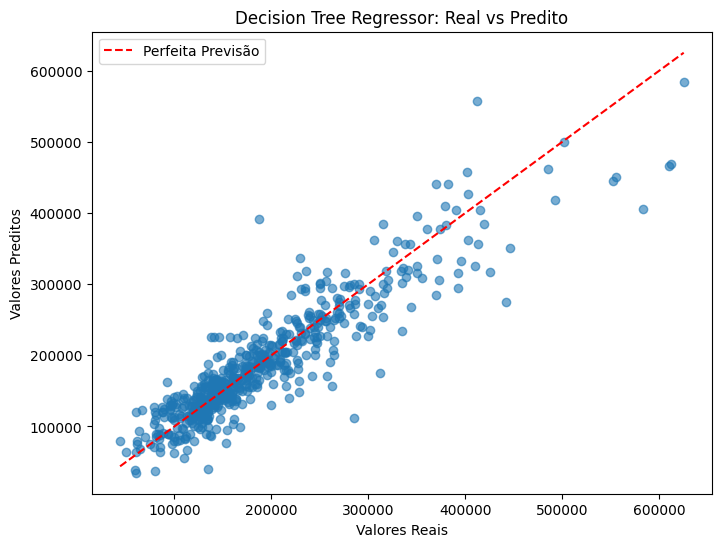

In [404]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfeita Previsão')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Decision Tree Regressor: Real vs Predito")
plt.legend()
plt.show()

In [405]:
feat_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

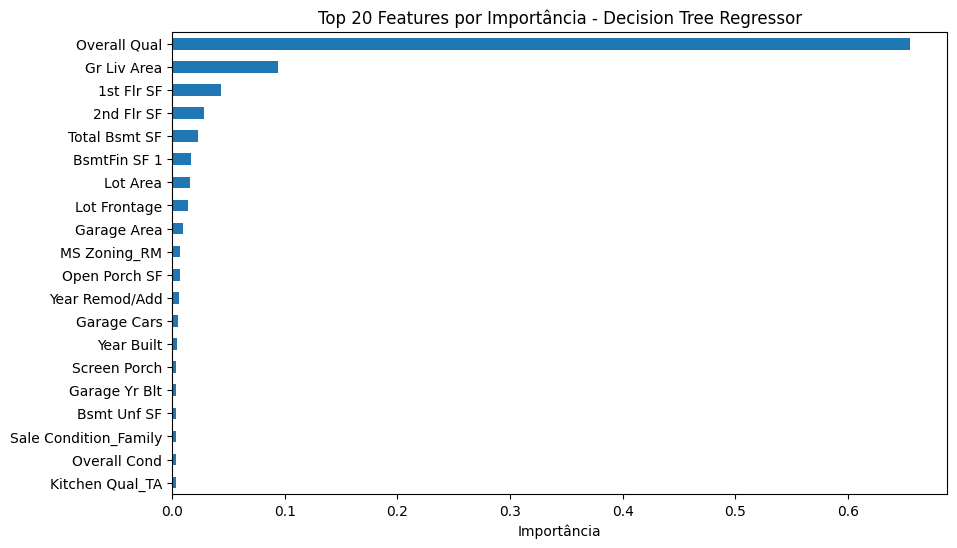

In [406]:
plt.figure(figsize=(10,6))
feat_importances.head(20).plot(kind='barh')  # top 20 features
plt.gca().invert_yaxis()
plt.title("Top 20 Features por Importância - Decision Tree Regressor")
plt.xlabel("Importância")
plt.show()

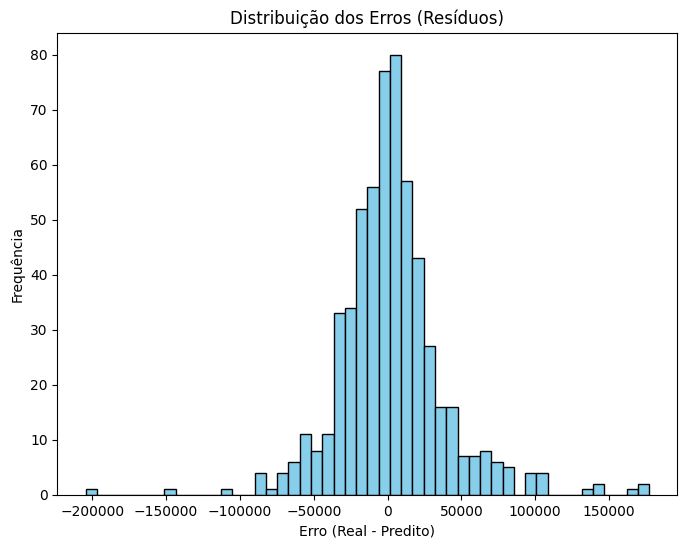

In [407]:
residuals = y_test - y_pred_test
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribuição dos Erros (Resíduos)")
plt.xlabel("Erro (Real - Predito)")
plt.ylabel("Frequência")
plt.show()

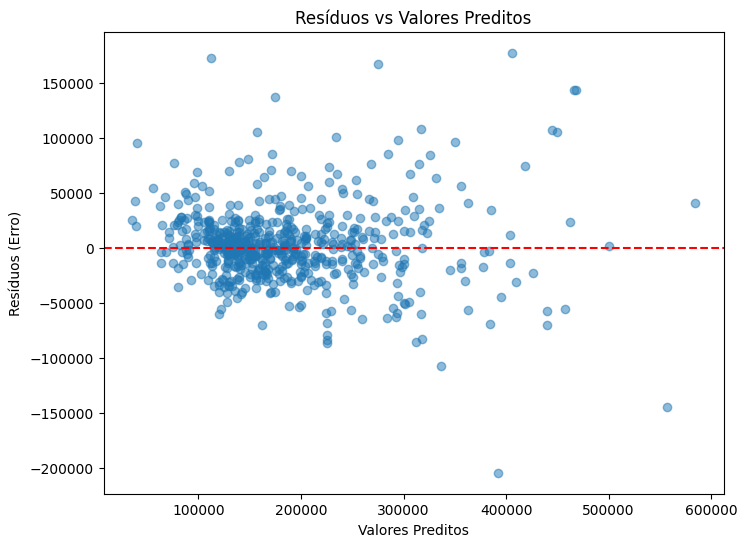

In [408]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos (Erro)")
plt.title("Resíduos vs Valores Preditos")
plt.show()

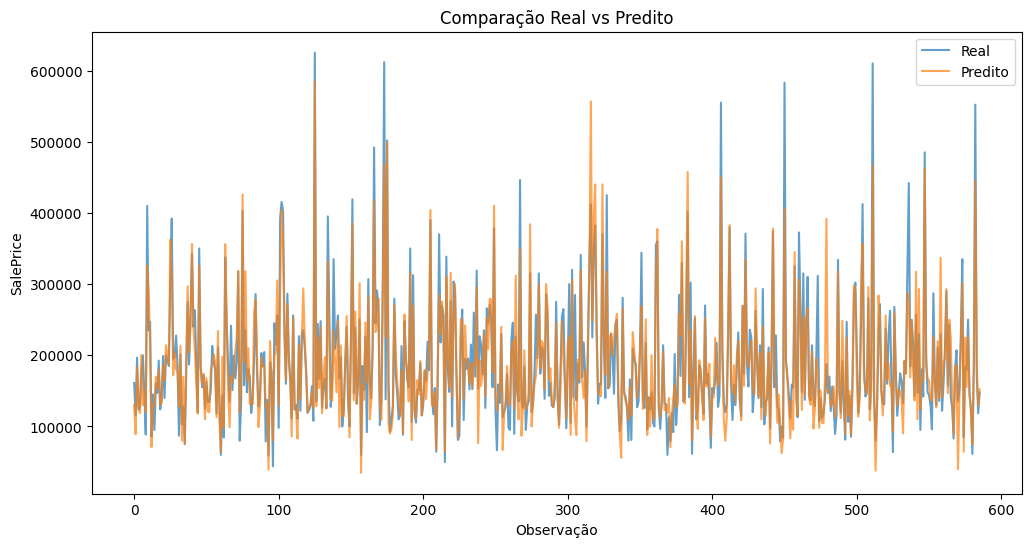

In [409]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(y_test)), y_test, label="Real", alpha=0.7)
plt.plot(np.arange(len(y_pred_test)), y_pred_test, label="Predito", alpha=0.7)
plt.xlabel("Observação")
plt.ylabel("SalePrice")
plt.title("Comparação Real vs Predito")
plt.legend()
plt.show()

## 8 - Conclusão

texto